## 1) Import Required Packages
*The following code imports the required packages for this HW assignment

  

In [213]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2) Import the datasets
## a) Import the dataset Hitters.csv
*The following code imports the file, Hitters.csv, into the notebook and assigns the name df_Hi to the data.

In [214]:
df_Hi = pd.read_csv(r"C:\Users\Katabatic\Desktop\DATA 3550\Hitters.csv")


## b) Print the info of df_Hi and explain

In [215]:
df_Hi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

* We observved that the datafram of df_Hi consists of 20 variables with 322 observations. Among them, 17 variables are numberic variables and three of them are categorical. The variable salary has missing values as the total nummber of non_null count is 263 which is less than the total number of observations. The other variables have no missing values.

## 3) Data Visualization

## a) Create a visualization to observe the missing values and their patterns in the df_Hi and explain your observations
* The following code creates a graphical representation of the matrix of missing values.

<Axes: >

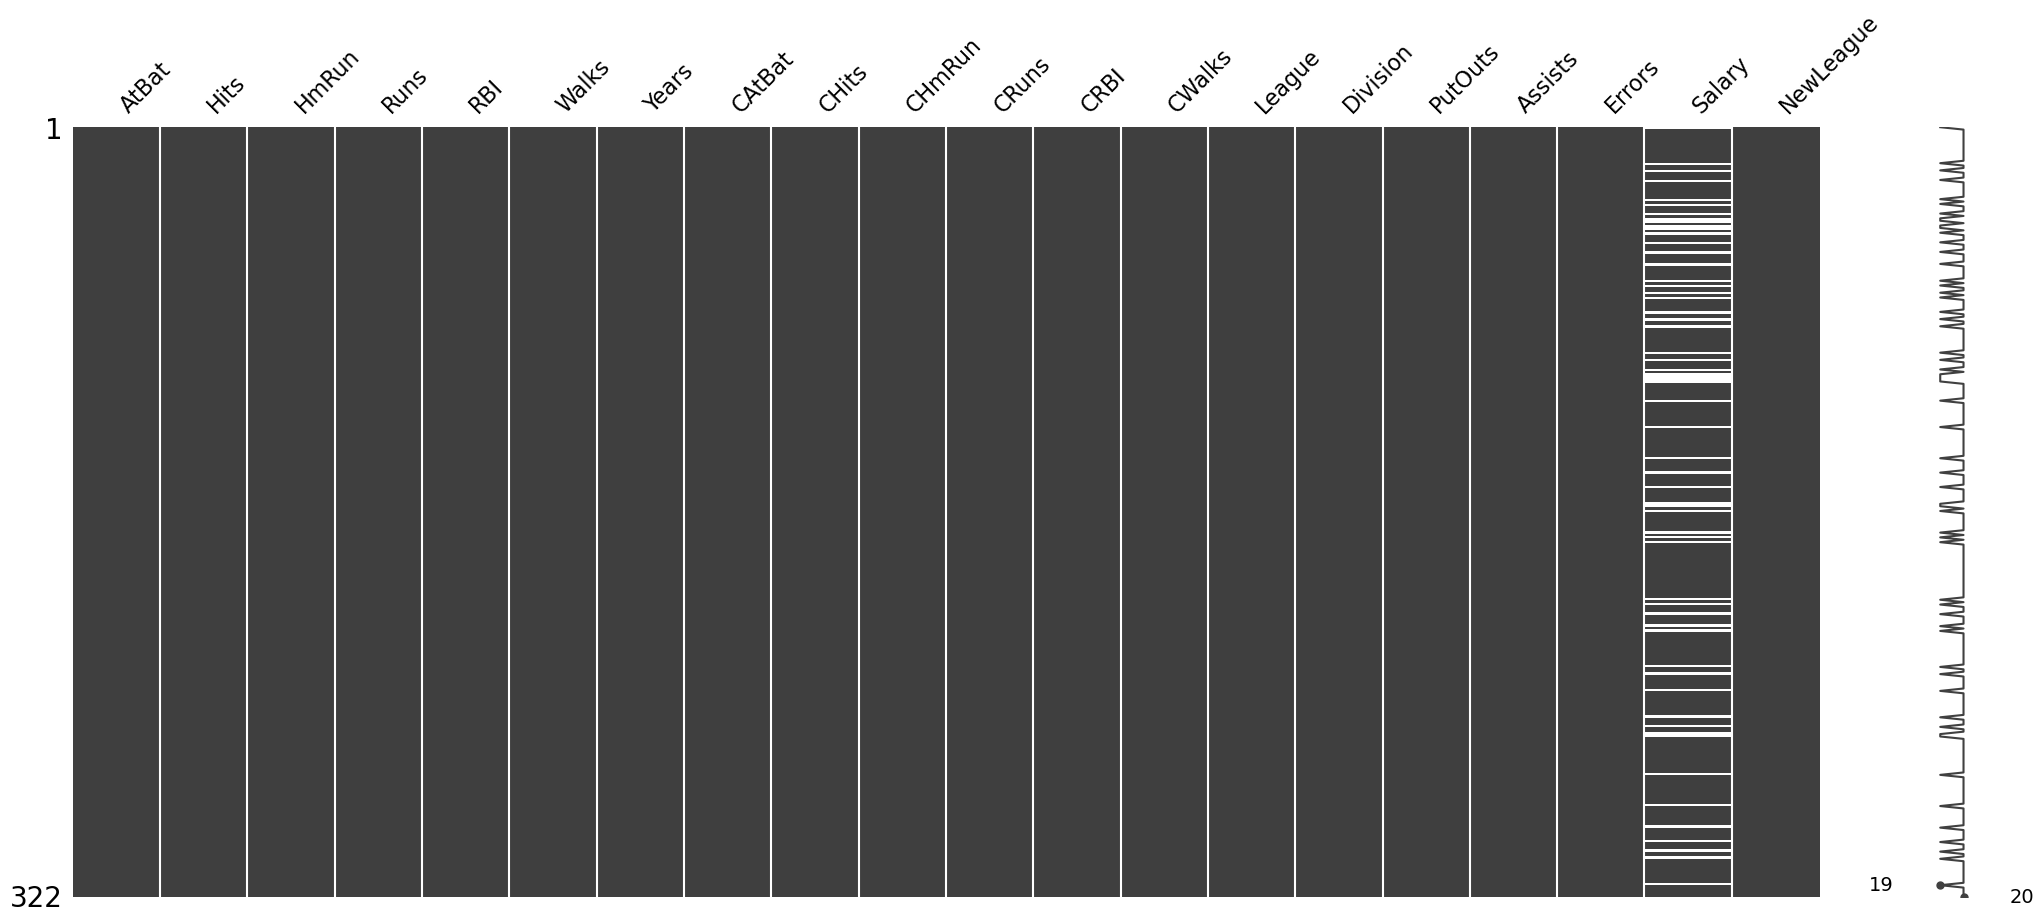

In [216]:
msno.matrix(df_Hi)

* From the visualization produced by missingno(), we can see that only one variable has missing values, Salary. There doesn't appear to be any pattern for the missing values within Salary.

## b) Create a countplot of the three categorical variables in the data and explain your observations. 
 
 * The code below creates three plots for 'League', 'Division', and 'NewLeague' which are the three categorical variables of this data set. 

Text(0.5, 1.0, 'NewLeague')

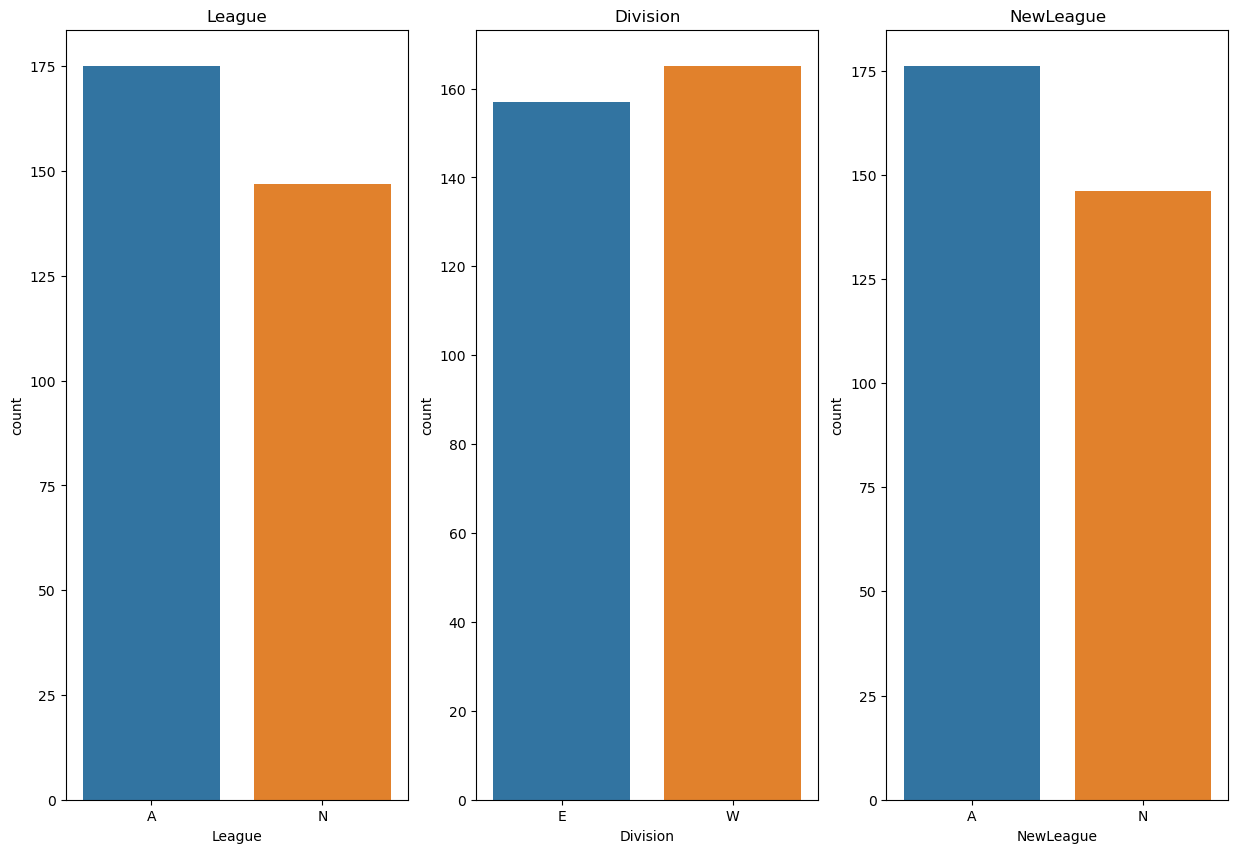

In [217]:
plt.figure(figsize=(15, 10)) #creates the desired figure size
plt.subplot(131) #creates the position. 1 row, 3 plots, this one is the first plot shown
sns.countplot(x = 'League', data=df_Hi) #shows we want a count plot with the x value being "league" using data df_Hi
plt.title('League')

plt.subplot(132)
sns.countplot(data=df_Hi, x='Division')
plt.title('Division')

plt.subplot(133)
sns.countplot(data=df_Hi, x='NewLeague')
plt.title('NewLeague')

* With the League chart, we notice that there are more players in League A vs. League N. Moving on to division, we see that they are relatively balanced with slightly more players in Division W. Finally in NewLeague, we see that it is relatively the same as League meaning that although players were likeyle traded, the amount of players in each League remained relatively the same from the beginning(NewLeague) to the end(League). 

## c) Create a distribution plot of all numerical variables. Breifly explain what you observe from those plots.
* The code below loops through all the columns that are numeric and creates distribution plots of the data.

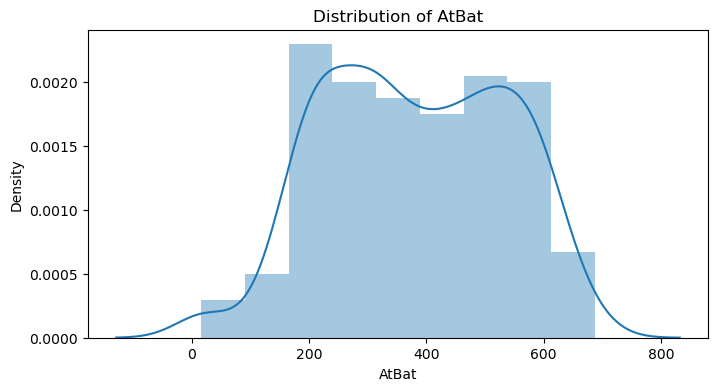

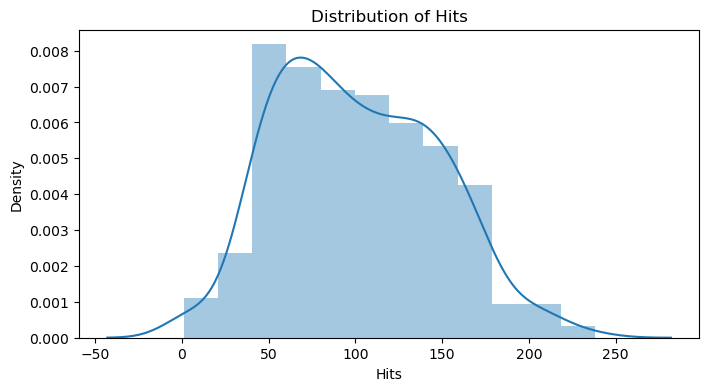

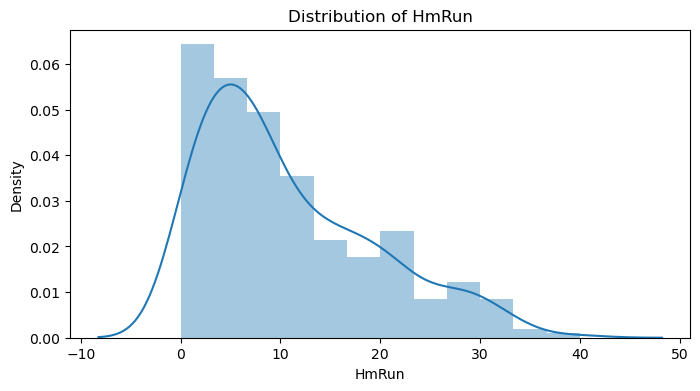

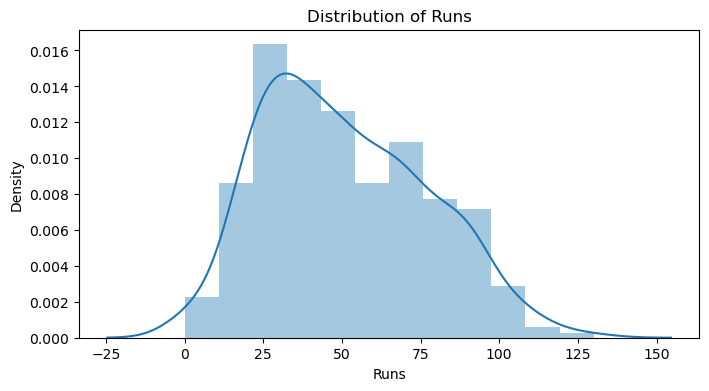

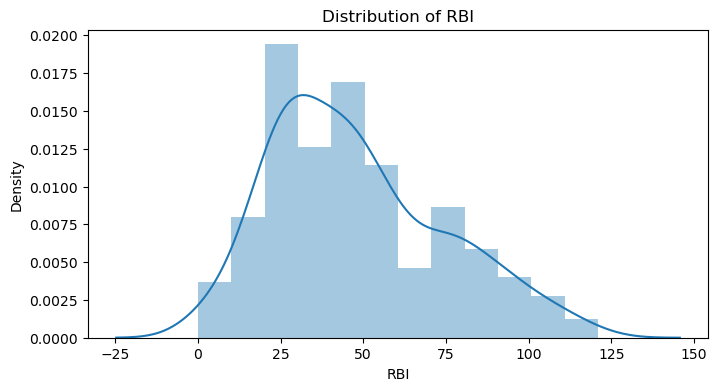

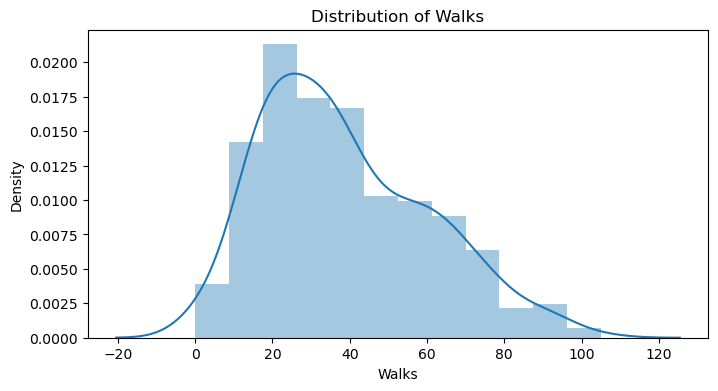

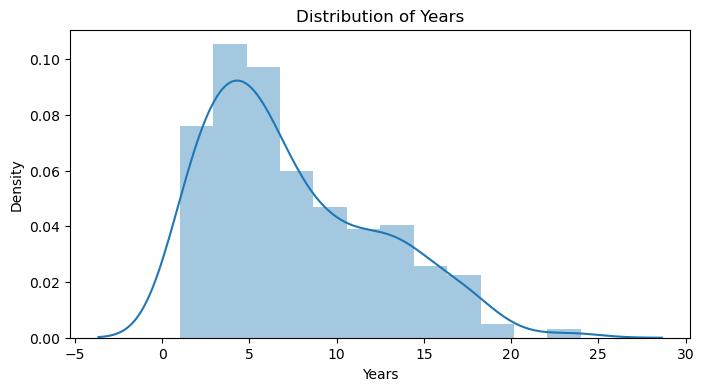

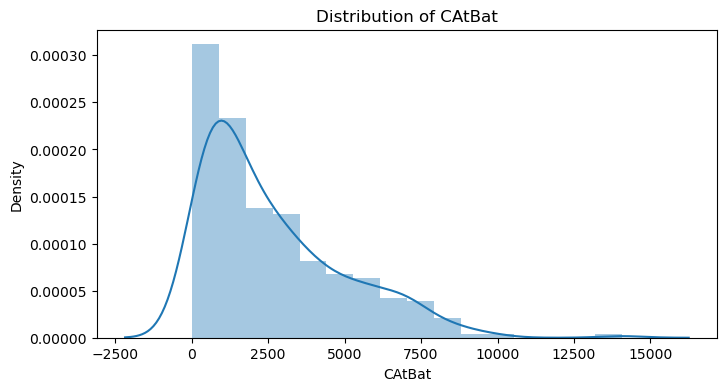

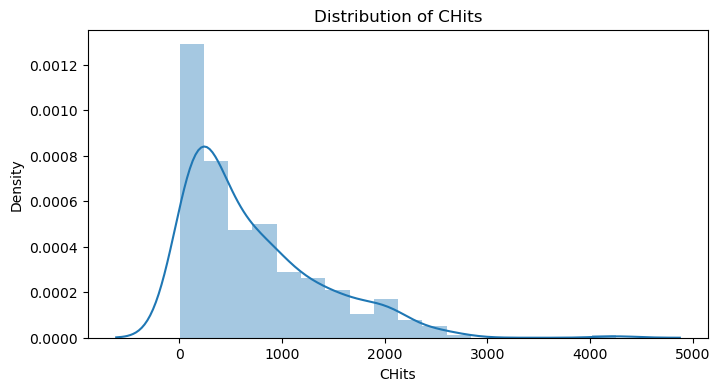

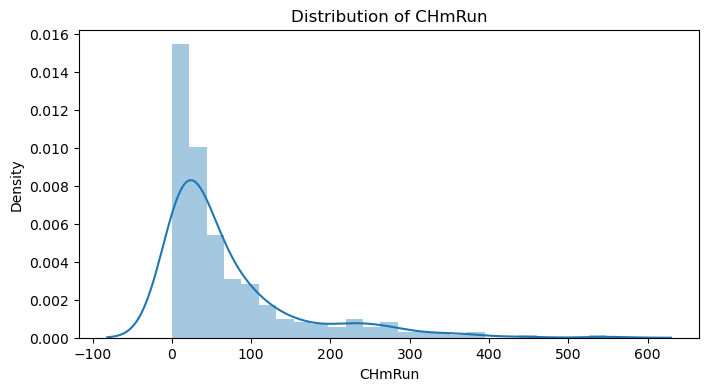

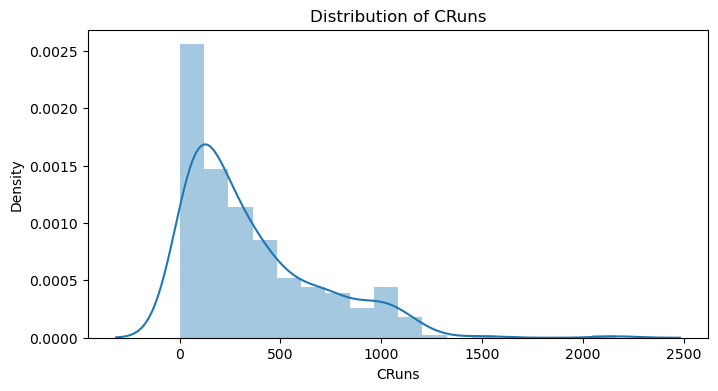

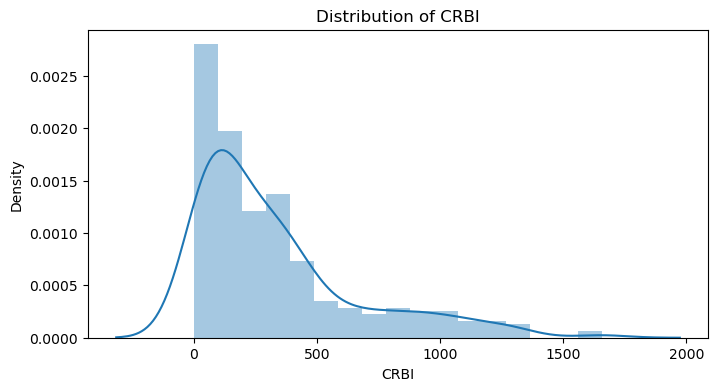

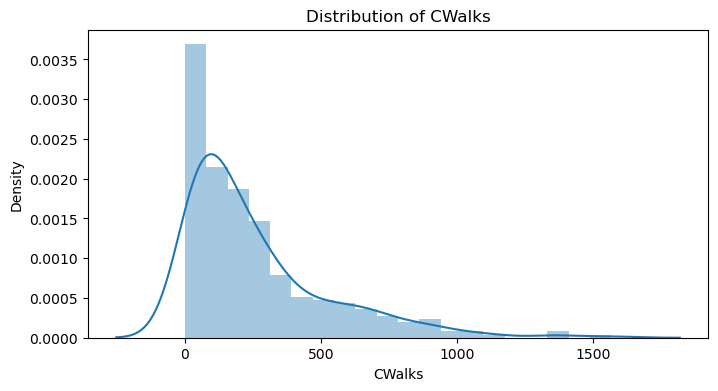

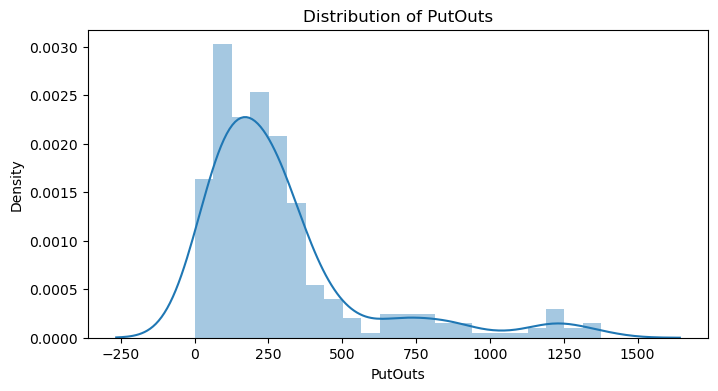

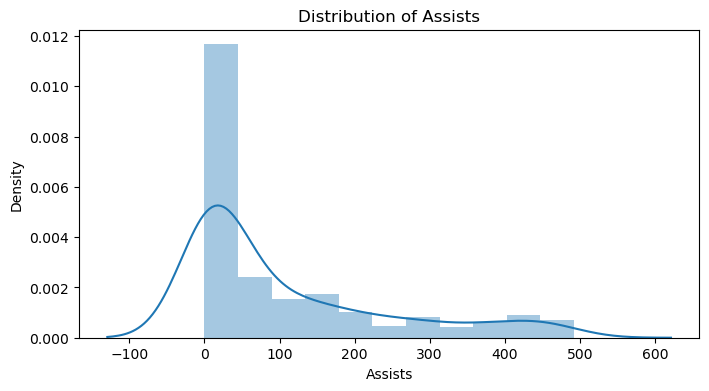

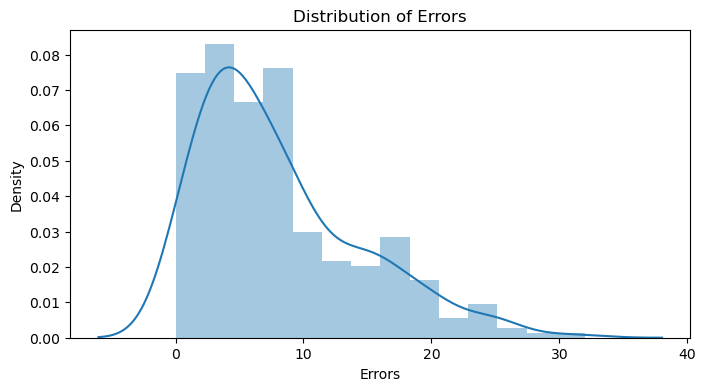

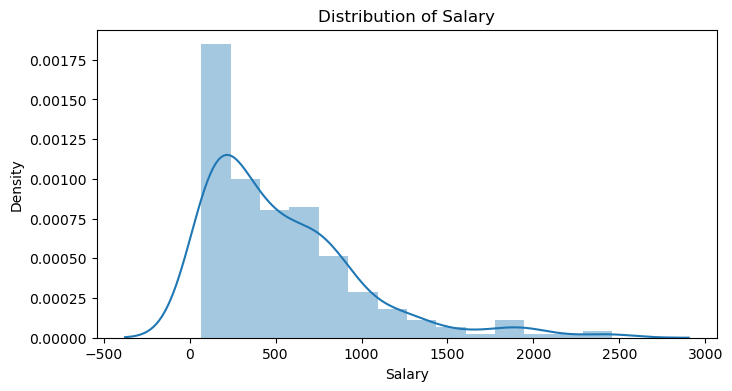

In [218]:
for col in df_Hi: #creates a loop for each column in a data to be ran
    if df_Hi[col].dtype == 'int64' or df_Hi[col].dtype == 'float64': #we only want numerical data to be shown, so this sets the criteria for it.
        plt.figure(figsize=(8, 4))
        sns.distplot(df_Hi[col])
        plt.title(f'Distribution of {col}')
        plt.show()
        

* If we look at the majority of these plots, we see right skew in the distribution plots. This makes sense because more players get paid league minimum than many millions of dollars, or more players hit less home runs than than the amount of players that hit many home runs in a season. The only plot with a relatively normal distribution is the AtBat plot. 

## d) Create a comparative boxplot of all the numerical variables. Explain your observation.
* The code below creates a comparative boxplot of all the numerical value columns.

Text(0.5, 1.0, 'Comparative Boxplot of Numerical Variables')

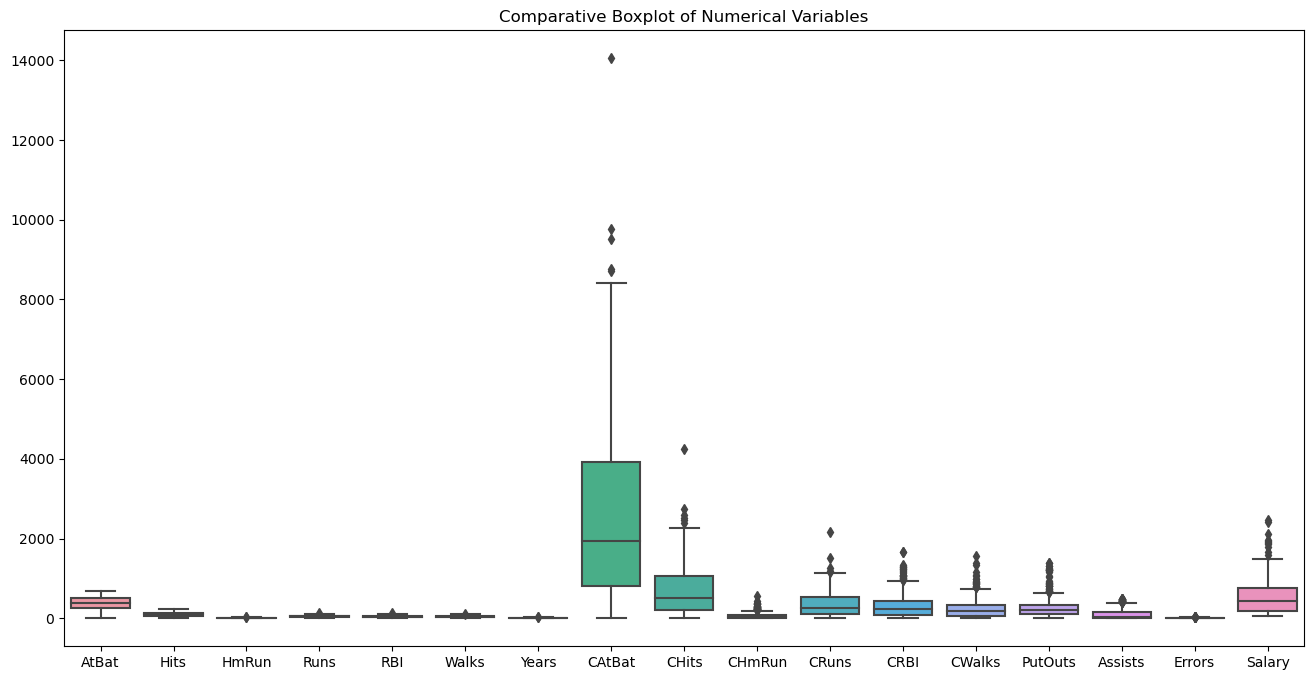

In [219]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_Hi.select_dtypes(include=['int64', 'float64']), orient='v') #This sets the parameters for seaborn that we want a boxplot using the data df_Hi and to only include columns of numerical data. 

plt.title('Comparative Boxplot of Numerical Variables')

* Here we can see more of the right skew in our data with most of the outliers being towards that end. I think if we took out the careeer statistics, the plot would be better understood. We also note that there are outliers in the data, mostly in the carrer stats.

## 4) Data Exploration

## a) Calculate the statistical summary of the data df_Hi. Explain your observations.
* the code below uses .describe to give the statistical summary of each column

In [220]:
print(df_Hi.describe()) #we use .describe from pandas to get the statistical summary for all numerical columns. 

            AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   380.928571  101.024845   10.770186   50.909938   48.027950   38.742236   
std    153.404981   46.454741    8.709037   26.024095   26.166895   21.639327   
min     16.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    255.250000   64.000000    4.000000   30.250000   28.000000   22.000000   
50%    379.500000   96.000000    8.000000   48.000000   44.000000   35.000000   
75%    512.000000  137.000000   16.000000   69.000000   64.750000   53.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years       CAtBat        CHits      CHmRun        CRuns  \
count  322.000000    322.00000   322.000000  322.000000   322.000000   
mean     7.444099   2648.68323   717.571429   69.490683   358.795031   
std      4.926087   2324.20587   654.472627   86.26606

* Although we can't see it visually, we can still see how many of these plots tend to have right skew. Salary for example has a low of 67, a mean of 535, and a high of 2460 which is much farther from the mean than the low of 67. It is interesting seeing the minimums for most of these columns being 0, meaning that there is at least one person in the league who has zero walks. This could mean that this is there first year, but it would be interesting to see who has had more time in the league and still has zero errors. 

## b) Observe the unique number of values, most repeated values, and least repeated values of the variables.

In [221]:
for col in df_Hi:#creates the loop for our dataframe to go through each column
    unique_count = df_Hi[col].nunique() #the .nunique() counts all the different values within the column
    most_common = df_Hi[col].mode().values #we get the mode and use .values to display which values are repeated the most since there could be many
    least_common = df_Hi[col].value_counts().idxmin() #we use value_counts to count the unique values and then add .idxmin() to index the least counted element
    print(f'Column: {col}')
    print(f'Unique Count: {unique_count}')
    print(f'Most Common Value: {most_common}')
    print(f'Least Common Value: {least_common}')
    print('\n')

Column: AtBat
Unique Count: 247
Most Common Value: [209 216 315]
Least Common Value: 212


Column: Hits
Unique Count: 144
Most Common Value: [53 70 76]
Least Common Value: 109


Column: HmRun
Unique Count: 36
Most Common Value: [4]
Least Common Value: 34


Column: Runs
Unique Count: 96
Most Common Value: [42]
Least Common Value: 16


Column: RBI
Unique Count: 103
Most Common Value: [29]
Least Common Value: 68


Column: Walks
Unique Count: 89
Most Common Value: [22]
Least Common Value: 3


Column: Years
Unique Count: 22
Most Common Value: [4]
Least Common Value: 24


Column: CAtBat
Unique Count: 314
Most Common Value: [  41  216  312  711 1258 1350 1928 2331]
Least Common Value: 1968


Column: CHits
Unique Count: 288
Most Common Value: [160 238 408 715]
Least Common Value: 228


Column: CHmRun
Unique Count: 146
Most Common Value: [32]
Least Common Value: 20


Column: CRuns
Unique Count: 261
Most Common Value: [20]
Least Common Value: 405


Column: CRBI
Unique Count: 262
Most Common Valu

## c) Check if there are any outliers in the dataset.
* The code below prints the comparative boxplot again. I believe this shows the outliers the best at least visually.

Text(0.5, 1.0, 'Comparative Boxplot of Numerical Variables')

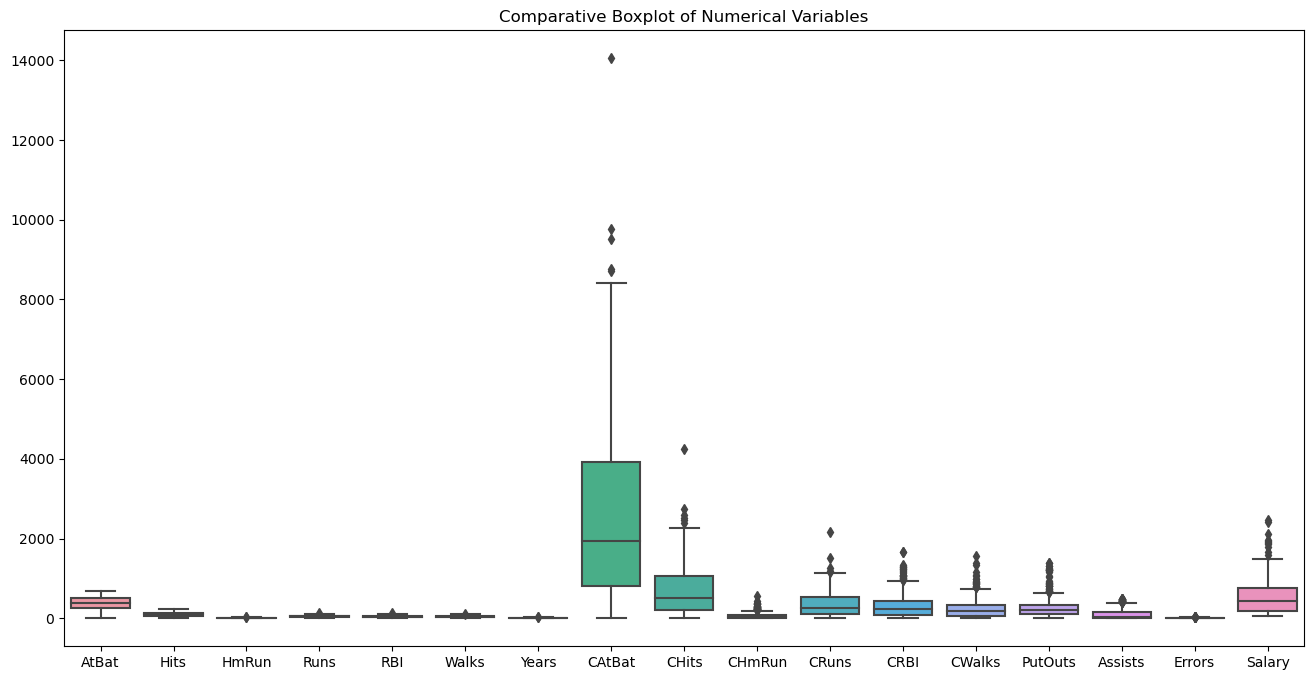

In [222]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_Hi.select_dtypes(include=['int64', 'float64']), orient='v') #This sets the parameters for seaborn that we want a boxplot using the data df_Hi and to only include columns of numerical data. 

plt.title('Comparative Boxplot of Numerical Variables')

* As we can see, the dots are the outliers in the data. Typically, they are in carrer states and tend to be right skewed. This makes sense because you are more likely to hit less home runs, than to hit many home runs. 

## 5. Imputing Missing Values






## a) Check if there is any missing values in the Salary column of DataFrame df_Hi. What did you notice?

* The code below searches for nas in the column and uses sum() to total how many nas there are in each column.

In [223]:
df_Hi.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

* When we run df_Hi.isna().sum() we see that we are missing values in the Salary column (59 entries missing)

## b) How do we impute the missing values for df_Hi? Why did you use that, write your reasoning.

* The code below finds the mean of the salary column. It then fills in the missing of the salary columns with the average salary. Finally, it prints the first five rows of df_hi

In [224]:
mean_salary = df_Hi['Salary'].mean()
df_Hi['Salary'] = df_Hi['Salary'].fillna(mean_salary)
df_Hi.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N


* I chose the fill the missing values with the average salary. I don't believe that there is a good way to fill in null values, but the average makes the most sense for this specific problem. All the players are getting paid something and since we are missing a significant amount of information, filling it in with the typical salary makes the data the most realistic. 

## c) Verify that you correctly imputed the missing values.

* The code below prints the first five rows of df_Hi. It also displays the mean. 

In [225]:
df_Hi.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N


In [226]:
mean_salary = df_Hi['Salary'].mean()
print(mean_salary)

535.9258821292775


* Before we filled in the missing values, the first row was missing the salary. Now, there is a salary for that row. We also printed the mean salary and can verify that the salary for the first row matches the mean salary. 

## 6. Create the Dummy Variables
## a) Create the dummies of the variable NewLeague. What is the count of each category?
* The code below turns the categorical variables in NewLeague into dummy variables. Then we use value_counts to print out the total for each category. 

In [227]:
newLeague_dummy = pd.get_dummies(df_Hi['NewLeague'])
newLeague_dummy.columns = ['NewLeague A', 'NewLeague N'] #this assigns new column names for the variables. 
print(newLeague_dummy.value_counts())

NewLeague A  NewLeague N
1            0              176
0            1              146
dtype: int64


* As we can see from the printout, A = 176 and N =146. 

## b) Create the dummies of the variable League. What is the count of each category?
* The code below turns the categorical variables in League into dummy variables. Then we use value_counts to print out the total for each category. 

In [228]:
league_dummy = pd.get_dummies(df_Hi['League'])
league_dummy.columns = ['League A','League N']
print(league_dummy.value_counts())

League A  League N
1         0           175
0         1           147
dtype: int64


* As we can see from the print out A = 175 and N = 147

## c) Create the dummies of the variable Division. What is the count of each category?
* * The code below turns the categorical variables in Division into dummy variables. Then we use value_counts to print out the total for each category. 

In [229]:
division_dummy = pd.get_dummies(df_Hi['Division'])
division_dummy.columns = ['Division E', 'Division W']
print(division_dummy.value_counts())

Division E  Division W
0           1             165
1           0             157
dtype: int64


* As we can see from the printout, E has 157 and W has 165

## 7. Merge the Data and perform the correlation analysis

## a) Merge the dummies created with the DataFrame df_Hi.

In [230]:
df_merged = pd.concat([df_Hi, newLeague_dummy, division_dummy, league_dummy], axis=1)
df_merged.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,Salary,NewLeague,NewLeague A,NewLeague N,Division E,Division W,League A,League N
0,293,66,1,30,29,14,1,293,66,1,...,33,20,535.925882,A,1,0,1,0,1,0
1,315,81,7,24,38,39,14,3449,835,69,...,43,10,475.000000,N,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,82,14,480.000000,A,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,11,3,500.000000,N,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,40,4,91.500000,N,0,1,1,0,0,1


* We used the concat function to add the new columns to the end of the dataframe.

## b) Look at the info of the data, how many variables are there now?
* The code below prints the info of the merged data frame

In [231]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    int64  
 1   Hits         322 non-null    int64  
 2   HmRun        322 non-null    int64  
 3   Runs         322 non-null    int64  
 4   RBI          322 non-null    int64  
 5   Walks        322 non-null    int64  
 6   Years        322 non-null    int64  
 7   CAtBat       322 non-null    int64  
 8   CHits        322 non-null    int64  
 9   CHmRun       322 non-null    int64  
 10  CRuns        322 non-null    int64  
 11  CRBI         322 non-null    int64  
 12  CWalks       322 non-null    int64  
 13  League       322 non-null    object 
 14  Division     322 non-null    object 
 15  PutOuts      322 non-null    int64  
 16  Assists      322 non-null    int64  
 17  Errors       322 non-null    int64  
 18  Salary       322 non-null    float64
 19  NewLeagu

* We now have 26 variables 

## c) Create the heatmap that shows the pairwise correlation between all the variables.
* The code below creates the head map for the correlation matirx. 

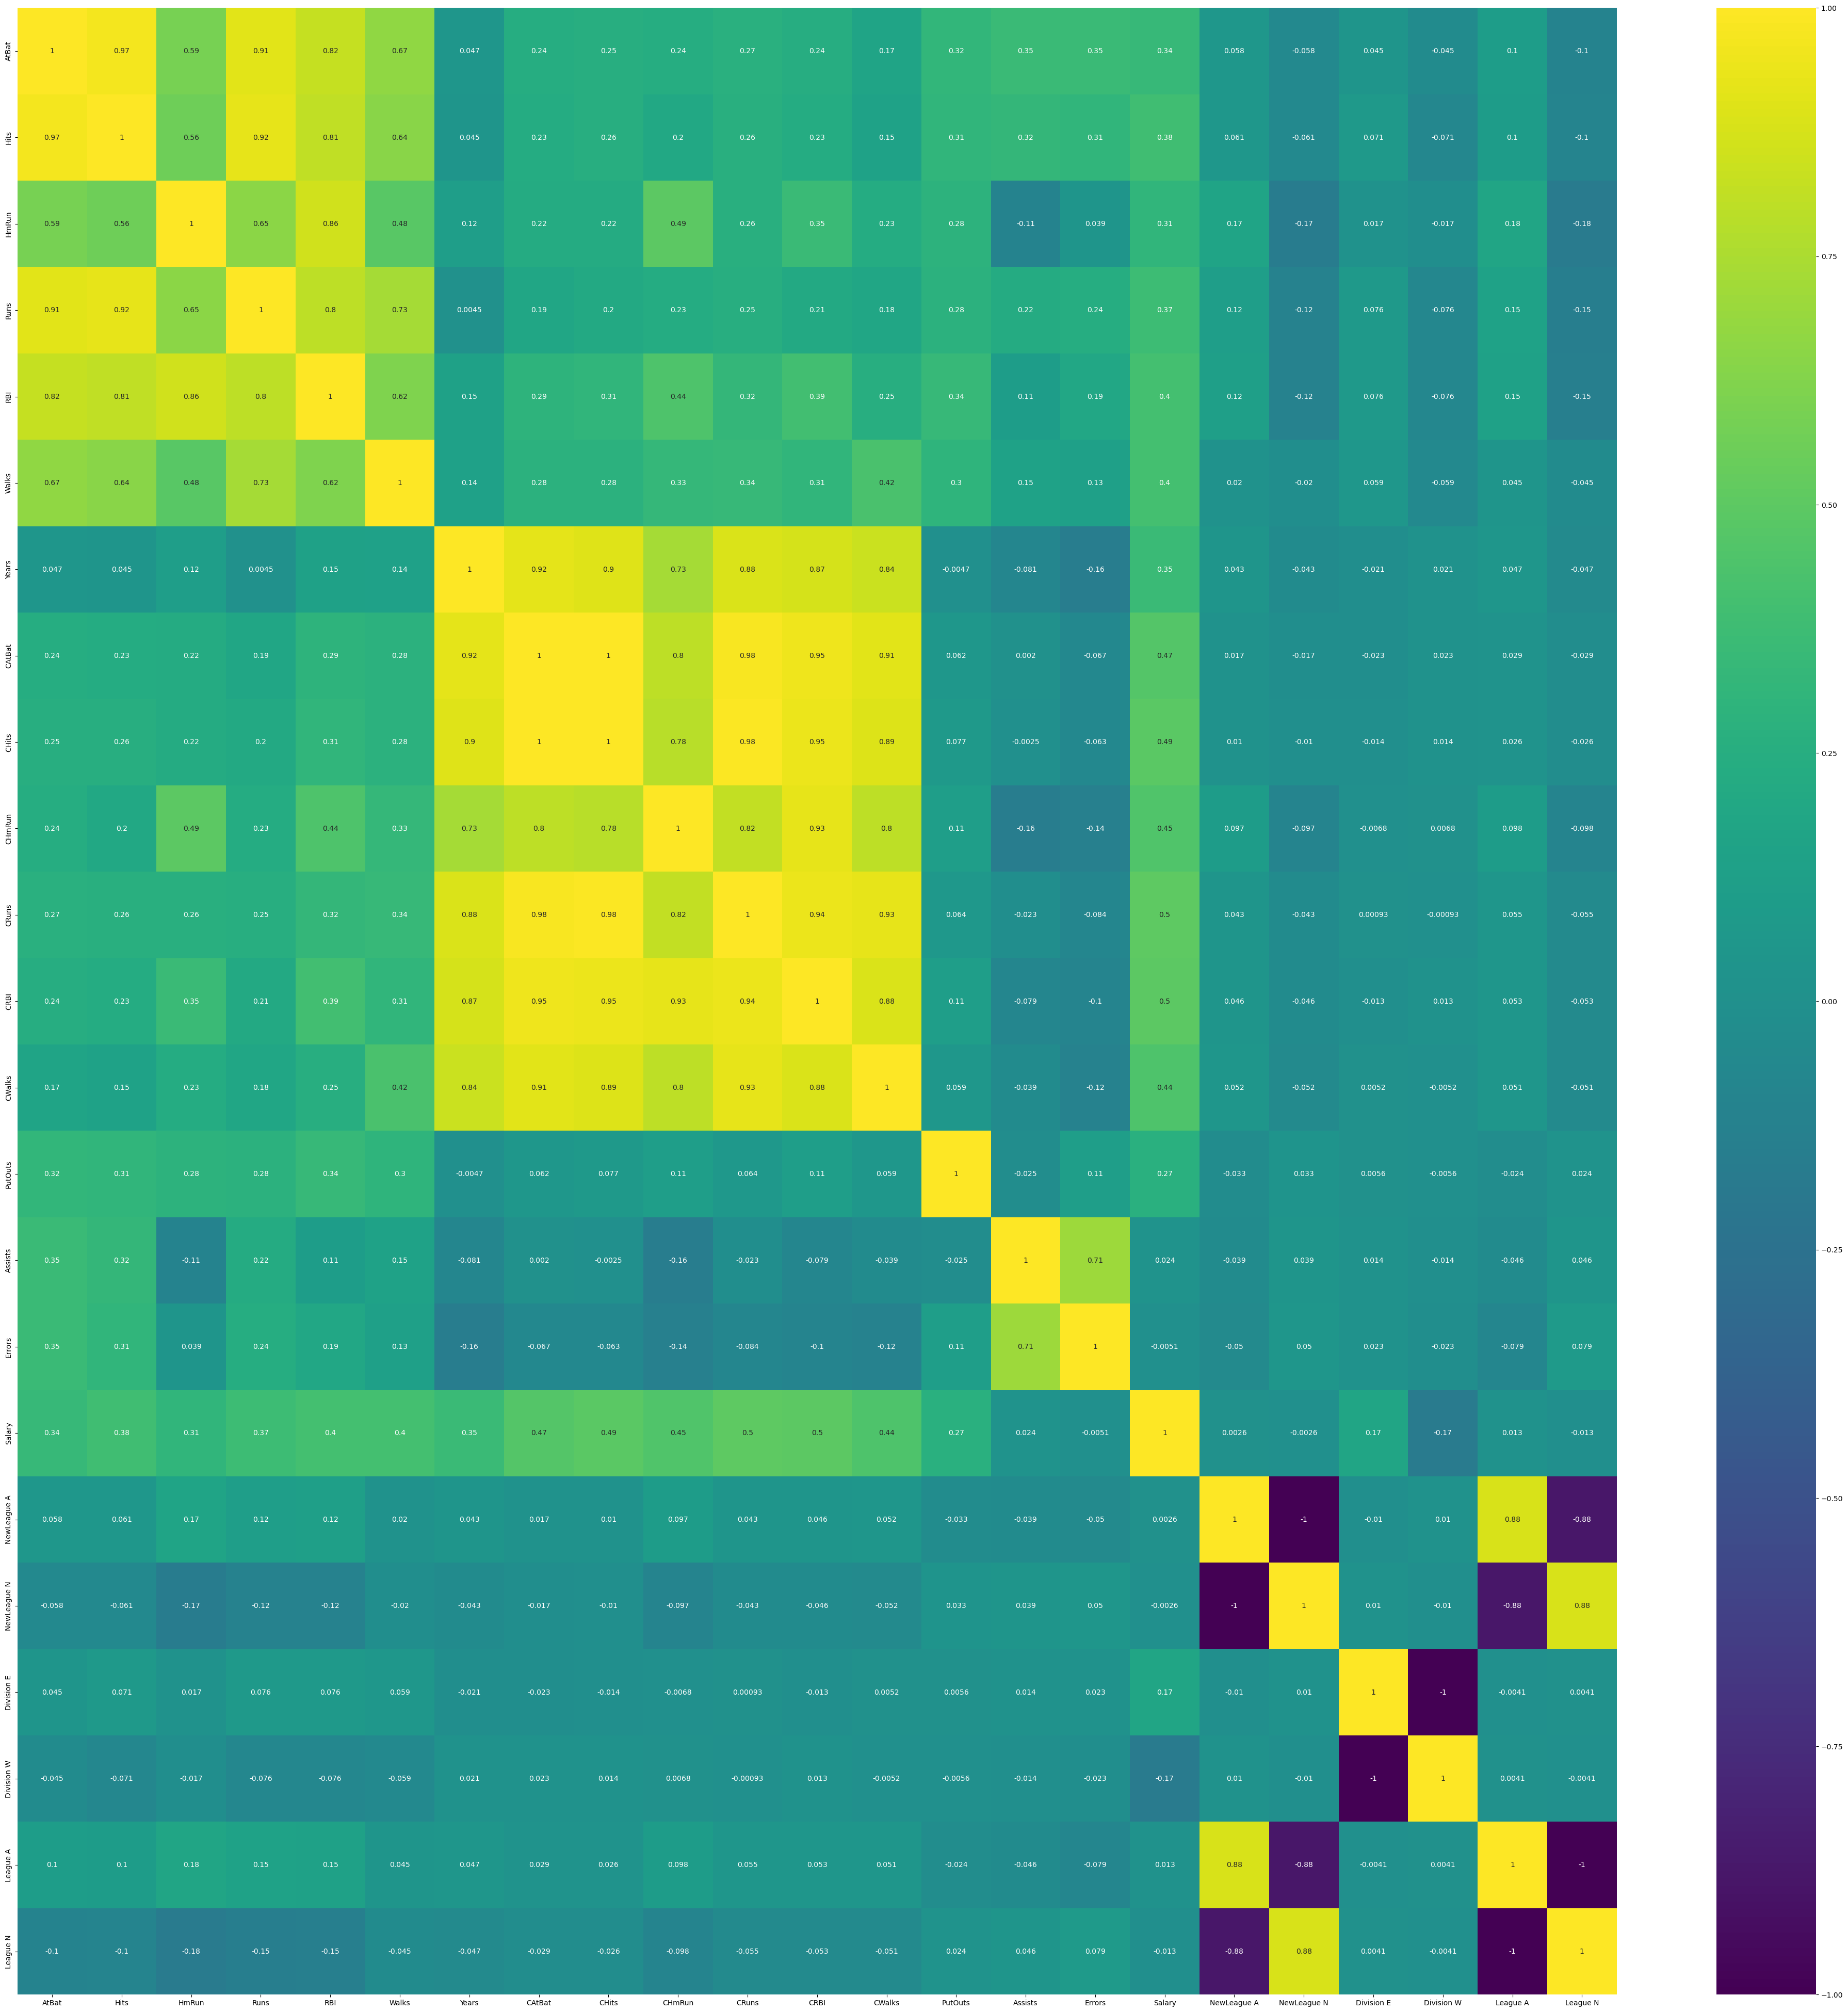

In [232]:
fig = plt.figure(figsize = (50,50))
sns.heatmap(df_merged.corr(), cmap="viridis", annot=True)
plt.show()

## d) Observe the correlation coefficients and identify the pairs that has a correlation of more than 0.8 in absolute value.

In [236]:
correlation_matrix = df_merged.corr()

for row in correlation_matrix:
    for col in correlation_matrix:
        if row == col:
            break
        if row != col and abs(correlation_matrix.loc[row,col]) >.8:
            print(f"Correlation between '{row}' and '{col}': {correlation_matrix.loc[row, col]}")

Correlation between 'Hits' and 'AtBat': 0.967938822413252
Correlation between 'Runs' and 'AtBat': 0.9130603287774346
Correlation between 'Runs' and 'Hits': 0.922187191158091
Correlation between 'RBI' and 'AtBat': 0.8205392290403626
Correlation between 'RBI' and 'Hits': 0.8110732324123991
Correlation between 'RBI' and 'HmRun': 0.8551222045232474
Correlation between 'CAtBat' and 'Years': 0.9202893608239361
Correlation between 'CHits' and 'Years': 0.9036310571713059
Correlation between 'CHits' and 'CAtBat': 0.9950634819828763
Correlation between 'CRuns' and 'Years': 0.8828769125849802
Correlation between 'CRuns' and 'CAtBat': 0.9833453879950941
Correlation between 'CRuns' and 'CHits': 0.9846088158926343
Correlation between 'CRuns' and 'CHmRun': 0.8202427510303503
Correlation between 'CRBI' and 'Years': 0.8688121361006594
Correlation between 'CRBI' and 'CAtBat': 0.9492187801150668
Correlation between 'CRBI' and 'CHits': 0.9451410160276831
Correlation between 'CRBI' and 'CHmRun': 0.92948372

## e) Successively drop those variables until there is no variable in the pairwise correlation higher than 0.8.
* The code below uses .drop inorder to drop the columns. We use almost the same

In [237]:

variables_to_drop = [] #empty list for the variables to drop

#use basically the same loop we created above, the main difference being that we append the col name to the list instead of print 
for row in correlation_matrix:    
    for col in correlation_matrix:        
        if row != col and abs(correlation_matrix.loc[row, col]) > .8:            
            if row not in variables_to_drop: #this makes sure we are not duplicating
                variables_to_drop.append(col)


df_merged = df_merged.drop(variables_to_drop, axis=1) #drops the vaiables in the list
correlation_matrix = df_merged.corr() #resets the correlation matrix

In [238]:
correlation_matrix #to make sure it dropped the variables

,AtBat,HmRun,Walks,Years,CHmRun,PutOuts,Assists,Errors,Salary,NewLeague A,Division E
AtBat,1.000000,0.592198,0.669845,0.047372,0.236659,0.317550,0.353824,0.352117,0.342474,0.057655,0.045441
HmRun,0.592198,1.000000,0.481014,0.116318,0.493227,0.282923,-0.106329,0.039318,0.311615,0.166044,0.017206
Walks,0.669845,0.481014,1.000000,0.136475,0.332473,0.299515,0.149656,0.129382,0.402465,0.020029,0.059086
Years,0.047372,0.116318,0.136475,1.000000,0.726872,-0.004684,-0.080638,-0.162140,0.352235,0.042919,-0.021126
CHmRun,0.236659,0.493227,0.332473,0.726872,1.000000,0.112724,-0.158511,-0.138115,0.451876,0.097461,-0.006783
PutOuts,0.317550,0.282923,0.299515,-0.004684,0.112724,1.000000,-0.025024,0.109972,0.270721,-0.032833,0.005647
Assists,0.353824,-0.106329,0.149656,-0.080638,-0.158511,-0.025024,1.000000,0.706362,0.024361,-0.039066,0.013852
Errors,0.352117,0.039318,0.129382,-0.162140,-0.138115,0.109972,0.706362,1.000000,-0.005062,-0.050140,0.023121
Salary,0.342474,0.311615,0.402465,0.352235,0.451876,0.270721,0.024361,-0.005062,1.000000,0.002566,0.174008
NewLeague A,0.057655,0.166044,0.020029,0.042919,0.097461,-0.032833,-0.039066,-0.050140,0.002566,1.000000,-0.010155


## 8. Transfor the data
## a) Transform the column Salary to the binary numerical variable as follows: If the Salary is above the median salary assign the value 1, otherwise assign the value 0.
* The code below first identifies the median salary and assigns it to a variable. The we add the column to df_merged, give it a logical test and use .astype(int) to assign binary values. 

In [239]:
median_salary = df_merged['Salary'].median()
df_merged['AboveMedianSalary'] = (df_merged['Salary'] > median_salary).astype(int)


## b) Verify that you correctly transformed the data. Observe the count of 1 and 0 in this column after the transformation.
* the code below prints out the last five rows of df_merged

In [240]:
df_merged.tail()

,AtBat,HmRun,Walks,Years,CHmRun,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,NewLeague A,Division E,AboveMedianSalary
317,497,7,37,5,32,N,E,325,9,3,700.0,N,0,1,1
318,492,5,94,12,39,A,E,313,381,20,875.0,A,1,1,1
319,475,3,52,6,7,A,W,37,113,7,385.0,A,1,0,0
320,573,9,78,8,97,A,E,1314,131,12,960.0,A,1,1,1
321,631,9,31,11,30,A,W,408,4,3,1000.0,A,1,0,1


* The code below prints out the last five rows of the original df df_HI

In [241]:
df_Hi.tail()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.0,A


* the code below gets the count of the above median salary column

In [242]:
df_merged['AboveMedianSalary'].value_counts()

0    217
1    105
Name: AboveMedianSalary, dtype: int64

* Since there are no salary values above the median when using .head(), I used .tail() instead. If you scroll all the way over to the right, we can see that our code is working by assigning 1s to people who's salaries are above the median and zeros to those that are below. We then use .value_counts to count how many players are above or below the median. 217 are below and 105 are above. I also printed the tail of df_HI so that I could verify the 

## 9. Bonus Problem
## a) Create any interesting data visulizations that may provide further insights of the data. You can do anything that makes sense to you. Please explain your work properly.
* The scatter plot below is Hits vs Runs by players in each league. Since we noticed a high correlation between hits and runs earlier in this report, I thought it would be nice to see it visually. 

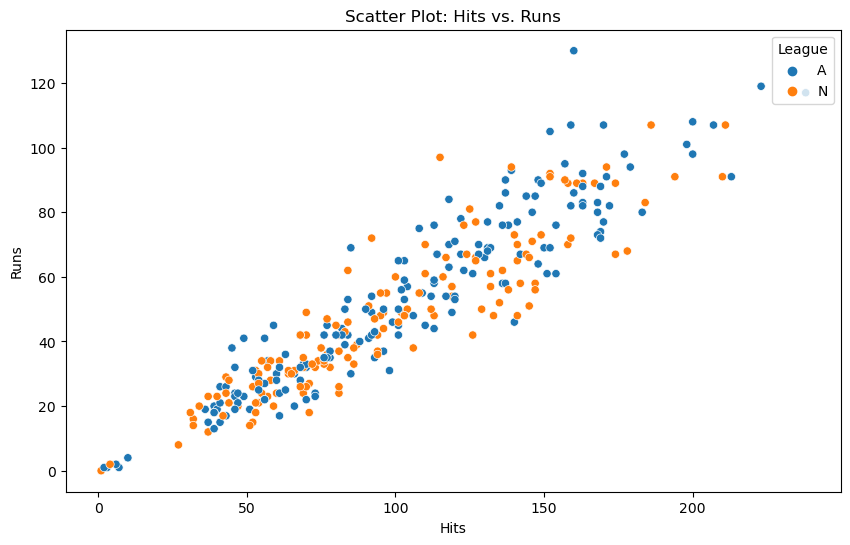

In [250]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Hi, x='Hits', y='Runs', hue='League')
plt.xlabel('Hits')
plt.ylabel('Runs')
plt.title('Scatter Plot: Hits vs. Runs')
plt.legend(title='League', loc='upper right')
plt.show()

## b) Create new features that you think is important and explain why it is important.

* I wanted to create a column of players who have more than 500 career hits. This is a good way to seperate players based upon overall carrer performance. Obviously, this doesn't mean that if a player doesn't have a one in this column they are no good because they could just be a younger player. 

In [243]:
greater_500_CRHits = 500
df_Hi['Above 500 Hits'] = (df_Hi['CHits'] > greater_500_CRHits).astype(int)

In [244]:
df_Hi.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Above 500 Hits
0,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,535.925882,A,0
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.000000,N,1
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.000000,A,0
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.000000,N,1
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.500000,N,0


In [245]:
df_Hi['Above 500 Hits'].value_counts()

1    162
0    160
Name: Above 500 Hits, dtype: int64

* This is kind of interesting becuase I had no idea where 500 hits would land, and it is about in the middle as we can see from the value counts. Hits are one of the most important aspects in baseball so I wanted to creat a new column to seperate upper echelon players. 